<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [6]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [8]:
print("\n--- Informações do Dataset ---")
df.info()

print("\n--- Estatísticas Descritivas (Colunas Numéricas) ---")
print(df.describe())

print("\n--- Estatísticas Descritivas (Colunas Categóricas) ---")
print(df.describe(include='object'))

print(f"\nO dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")


--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB

--- Estatísticas Descritivas (Colunas Numéricas) ---
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [16]:
missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

print("\n--- Valores Ausentes no Dataset ---")
print(missing_df)
missing_df.head(20)


--- Valores Ausentes no Dataset ---
                            Missing Values  Percentage (%)
AINextMuch less integrated           64289       98.245641
AINextLess integrated                63082       96.401119
AINextNo change                      52939       80.900714
AINextMuch more integrated           51999       79.464217
EmbeddedAdmired                      48704       74.428840
...                                    ...             ...
YearsCode                             5568        8.508948
NEWSOSites                            5151        7.871693
LearnCode                             4949        7.563000
EdLevel                               4653        7.110656
AISelect                              4530        6.922689

[109 rows x 2 columns]


,Missing Values,Percentage (%)
AINextMuch less integrated,64289,98.245641
AINextLess integrated,63082,96.401119
AINextNo change,52939,80.900714
AINextMuch more integrated,51999,79.464217
EmbeddedAdmired,48704,74.428840
EmbeddedWantToWorkWith,47837,73.103901
EmbeddedHaveWorkedWith,43223,66.052845
ConvertedCompYearly,42002,64.186928
AIToolNot interested in Using,41023,62.690832
AINextMore integrated,41009,62.669438


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



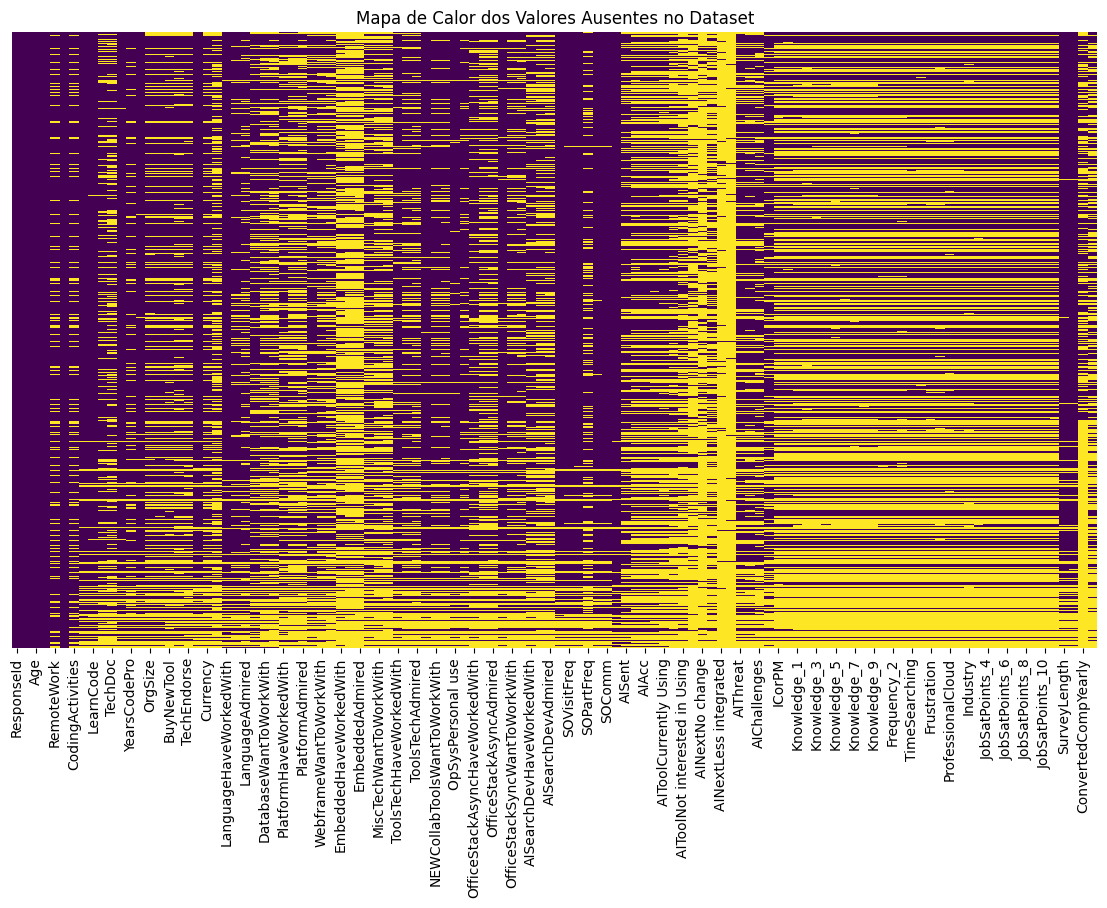

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), 
             cbar=False, 
             cmap='viridis', 
             yticklabels=False)

plt.title('Mapa de Calor dos Valores Ausentes no Dataset')
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [13]:
missing_proftech = df['ProfessionalTech'].isnull().sum()

print(f"Número de linhas com valor ausente na coluna 'ProfessionalTech': {missing_proftech}")

Número de linhas com valor ausente na coluna 'ProfessionalTech': 37673


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [14]:
most_frequent_value = df['ProfessionalTech'].mode()[0]

print(f"O valor mais frequente na coluna 'ProfessionalTech' é: {most_frequent_value}")

df['ProfessionalTech'].value_counts().head()

O valor mais frequente na coluna 'ProfessionalTech' é: None of these


ProfessionalTech
None of these                                                                                                                                                                                                                                                                             2834
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery;Innersource initiative    1068
DevOps function;Automated testing;Observability tools;Knowledge sharing community;AI-assisted technology tool(s);Microservices;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery                            706
Automated testing;Continuous integration (CI) and (more often) continuous delivery                                        

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [17]:
most_frequent_employment = df['Employment'].mode()[0]

print(f"O valor mais frequente na coluna 'Employment' é: {most_frequent_employment}")

df['Employment'].fillna(most_frequent_employment, inplace=True)

missing_after = df['Employment'].isnull().sum()

print(f"Número de valores ausentes na coluna 'Employment' após imputação: {missing_after}")

O valor mais frequente na coluna 'Employment' é: Employed, full-time
Número de valores ausentes na coluna 'Employment' após imputação: 0


/tmp/ipykernel_3222/1255997021.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_employment, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


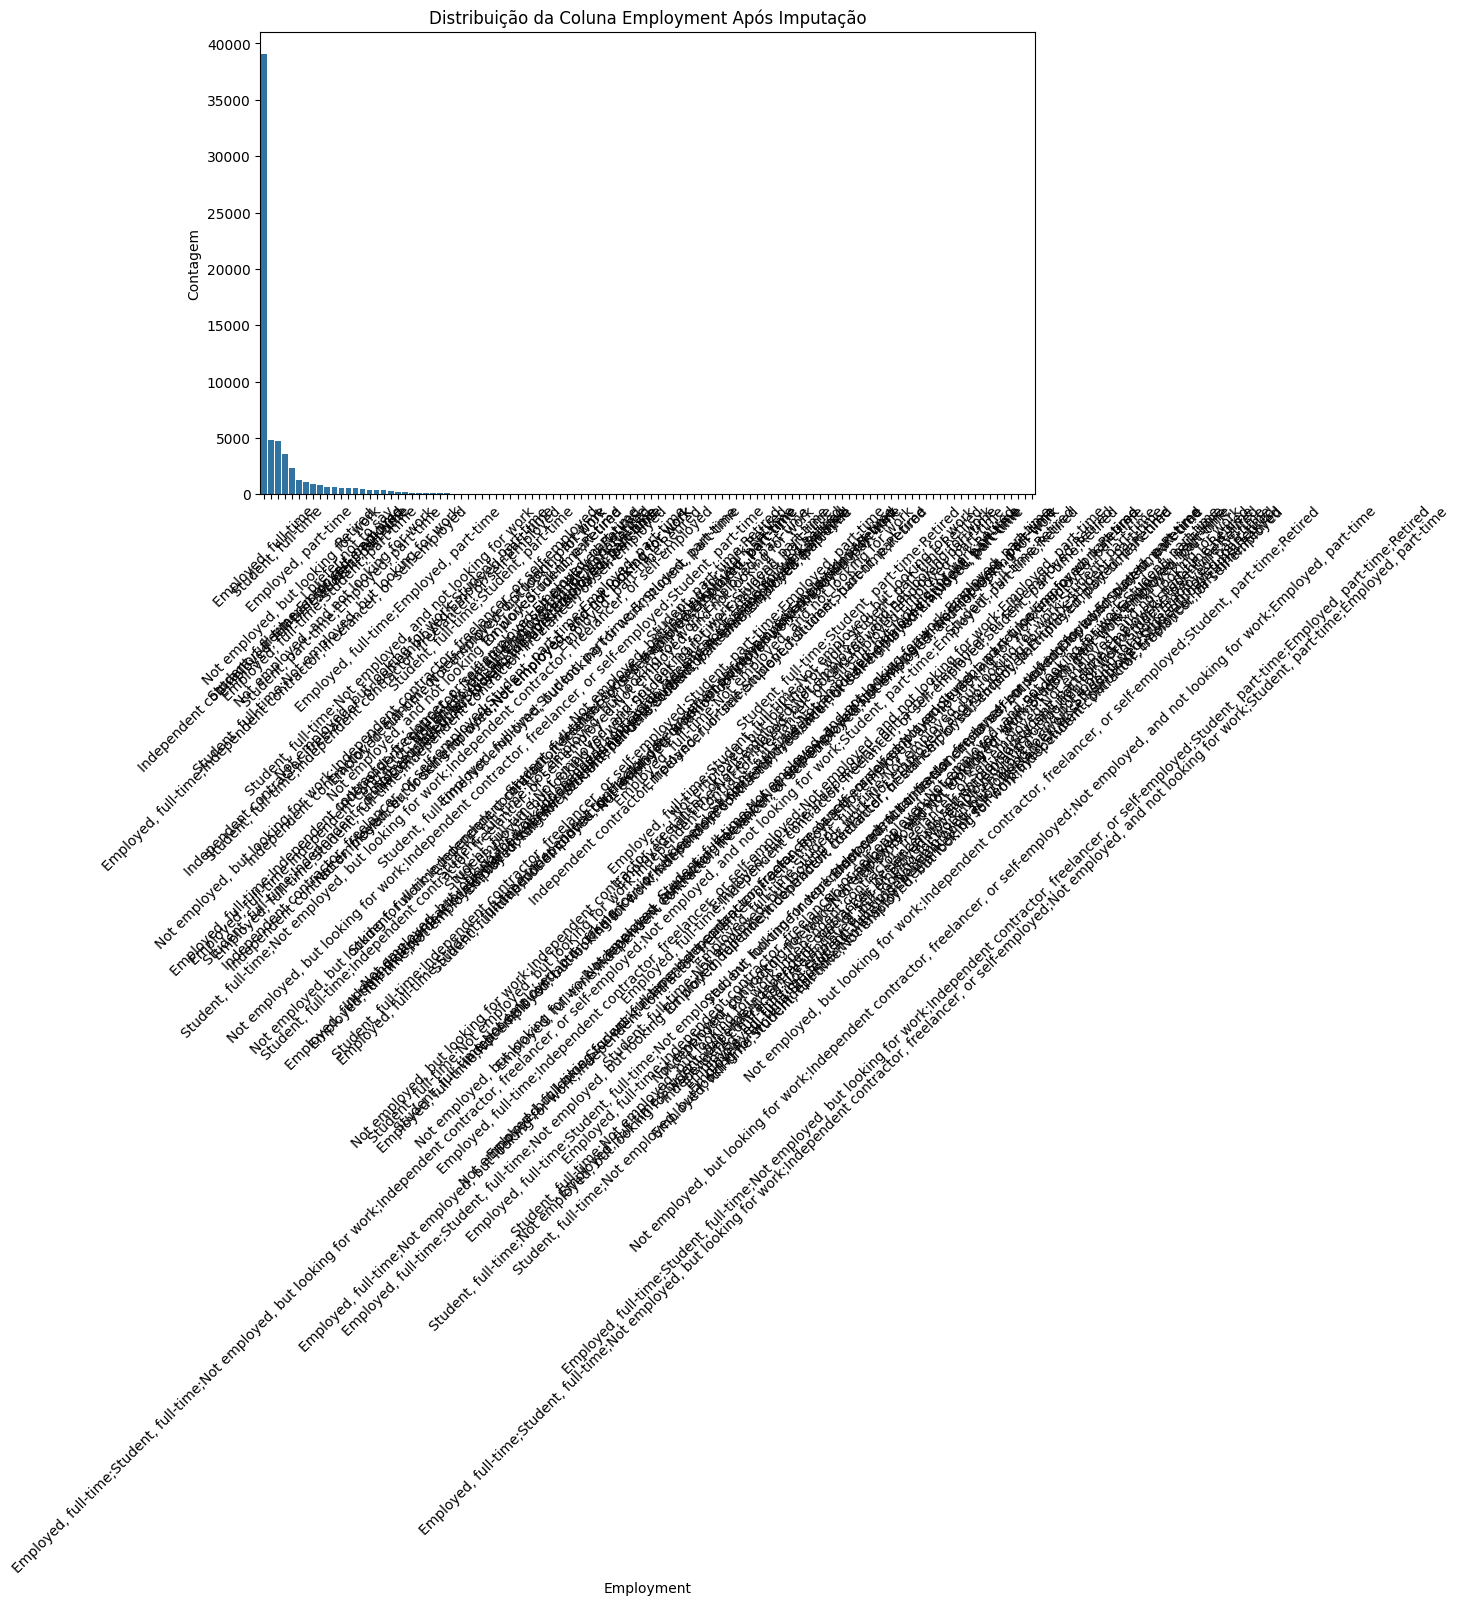

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição da Coluna Employment Após Imputação')
plt.xlabel('Employment')
plt.ylabel('Contagem')
plt.show()


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
